# 50.007 Machine Learning HW3
**Name**: Ryan Toh (1005129)

## 1. Logistic Regression

In [5]:
import numpy as np
from math import exp, log
from typing import Tuple, List
import matplotlib.pyplot as plt

# Data is formatted as [x1, x2, y] where y is 0 or 1.
data_ls = [
    [3, 2, 1],
    [5, 2, 0],
    [6, 3, 0],
    [7, 3, 0],
    [8, 3, 0],
    [3, 4, 1],
    [7, 4, 0],
    [6, 5, 0],
    [2, 6, 1],
    [3, 6, 1],
    [4, 6, 1],
    [7, 6, 0],
    [4, 7, 1]
]

# add zero to the front so x_0 = 0
for i in range(len(data_ls)):
    data_ls[i].insert(0, 1)
data:np.ndarray = np.array(data_ls)
X = np.array([v[:-1] for v in data])
Y = np.array([v[-1] for v in data])

In [6]:
def h(weight: np.ndarray, x: np.ndarray) -> float:
    """
    Applies the hypothesis function on x, where:
    - h_theta(x) = g(z), and
    - z = theta * x + theta_0, g is the logistic function
    """
    z = np.dot(x, weight)
    h = 1/(1 + exp(-z))
    return h

In [7]:
def get_risk(X: np.ndarray, Y: np.ndarray, weight: np.ndarray) -> float:
    """
    Calculates the risk of the given `weight` and `X` with the given `Y`.
    - Uses the maximum likelihood criterion
    """
    n = len(X)
    if n == 0:
        return 0
    def get_indiv_cost(x: np.ndarray, y: int, weight: np.ndarray) -> float:
        """
        Returns the individual cost associated with:
        - Predicted value h(weight, x)
        - Actual value y
        """
        if y == 1:
            return -log(h(weight, x))
        return -log(1- h(weight, x))
    overall_cost = 0
    for i in range(n):
        overall_cost += get_indiv_cost(X[i], Y[i], weight)
    return overall_cost / n

Weight: [ 5.17186191 -2.41702311  1.44246911]


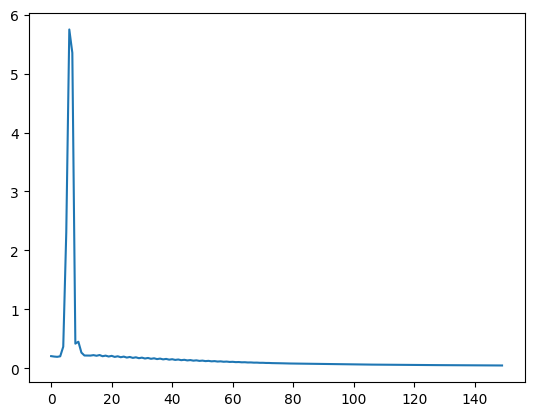

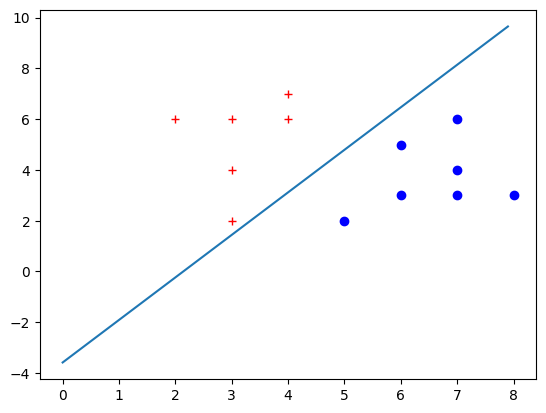

In [8]:
def batch_gradient_descent(X: np.ndarray, Y: np.ndarray, learning_rate: float=0.1, iterations: int=150, initial_weight: np.ndarray=np.array([0, -1, 1])) -> Tuple[np.ndarray, List[float]]:
    """
    Applies the batch gradient descent algorithm on X and Y.
    Returns:
    - the weight after `iterations` epochs 
    - List of training losses
    """
    def get_risk_gradient(X: np.ndarray, Y: np.ndarray, weight: np.ndarray) -> np.ndarray:
        n = len(X)
        if n == 0:
            return 0
        overall_grad = 0
        for i in range(n):
            indiv_grad = (h(weight, X[i]) - Y[i]) * X[i]
            overall_grad += indiv_grad
        
        return overall_grad

    n = len(X)
    weight = initial_weight
    losses = []

    if (n == 0):
        return weight, losses

    for k in range(iterations):
        risk_grad = get_risk_gradient(X, Y, weight)
        risk = get_risk(X, Y, weight)
        weight = weight - (learning_rate*risk_grad)
        losses.append(risk)
    return weight, losses

weight, losses = batch_gradient_descent(X, Y)
print(f"Weight: {weight}")

# Plot training losses
loss_fig = plt.figure()
ax1 = loss_fig.add_subplot()
index = np.arange(0, 150, 1)
ax1.plot(index, losses)

# Plot decision boundary
dec_fig = plt.figure()
ax2 = dec_fig.add_subplot()

positive_pts = []
negative_pts = []
for pt in data_ls:
    new_pt = pt[1:-1]
    if pt[-1] == 1:
        positive_pts.append(new_pt)
    else:
        negative_pts.append(new_pt)

x1 = np.arange(0, 8, 0.1)
x2 = (0 - (weight[1]*x1) - weight[0])/weight[2]
ax2.plot([v[0] for v in positive_pts], [v[1] for v in positive_pts], 'r+')
ax2.plot([v[0] for v in negative_pts], [v[1] for v in negative_pts], 'bo')
ax2.plot(x1, x2)

The decision boundary is:
$$
\begin{align*}
    x_2 
    &= -\frac{1}{\theta_2}(\theta_1 x_1 + \theta_0) \\
    &\approx 1.68x_1 -3.59 ~~\text{(3 s.f.)}
\end{align*}
$$

## 2. Neural Networks

(Refer to PDF in attached zip folder)

## 3. Naïve Bayes

(Refer to PDF in attached zip folder)